In [7]:
import json
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

# Prettify the given numpy output
np.set_printoptions(precision=0)   
np.set_printoptions(suppress=True)

## Get the data

In [8]:
with open('../data/reformattedComments.json','r') as handle:
    comments = json.load(handle)

In [14]:
m = np.zeros((len(comments), 3))
text = np.chararray((len(comments), 1))

for i in range(len(comments)):
    m[i,0] = comments[i]['id']
    m[i,1] = comments[i]['sentiment']
    m[i,2] = comments[i]['original_length']
    text[i,0] = comments[i]['text']

UnicodeEncodeError: 'ascii' codec can't encode character '\u2026' in position 18: ordinal not in range(128)

In [ ]:
m[100:110]

In [ ]:
m.shape

## Plot size vs rating

In [4]:
N = m.shape[0]
x = m[:,2]
y = np.random.rand(N)
colors = m[:,1]

plt.figure(figsize=(10,5))
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [50]:
# Do linear regression.
z = m[:,1]
c, b = np.polyfit(x, z, 1)

# Plot data.
plt.figure(figsize=(10,10))
plt.scatter(x,z, c ='black')

# Plot regression line.
X_plot = np.linspace(0,2500,2500)
plt.plot(X_plot, X_plot*c+b, c='black')

In [54]:
from scipy.stats.stats import pearsonr
pearsonr(z,x)

(0.11471528319146529, 7.8065530412140571e-09)

## Plot length of comments

In [13]:
hateless = m[m[:,1] == 0, :]
hateful = m[m[:,1] == 1, :]

In [16]:
data_to_plot = [m[:,2], hateless[:,2], hateful[:,2]]

fig = plt.figure(1, figsize=(16, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, vert = False)
plt.setp(bp['medians'],color='black')
plt.yticks([1, 2, 3],['All', 'Hateless', 'Hateful'])

([<matplotlib.axis.YTick at 0x7fbfb3a4f400>,
 <a list of 3 Text yticklabel objects>)

The hateful comments appear to be a little bit longer.

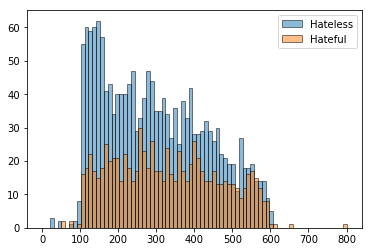

In [61]:
histogram=plt.figure()

x = hateless[:,2]
y = hateful[:,2]

bins = np.linspace(0, 800, 80)

plt.hist(x, bins, alpha=0.5, edgecolor='k', label='Hateless')
plt.hist(y, bins, alpha=0.5, edgecolor='k', label='Hateful')
plt.legend(loc='upper right', edgecolor=None)
plt.show()

## Plot text to 2-d

## PCA

In [17]:
m[:,2][1:20]

array([ 197.,  534.,  492.,  290.,  358.,  346.,  295.,  581.,  180.,
        140.,  207.,  382.,   75.,  140.,  430.,  439.,  235.,  280.,  475.])